#Project Description

You are a Data Analyst at Crankshaft List. A lot of free vehicle ads at the website everyday. As data analyst, you have to study the datasets of the last few years and determine the factors that affect the price of a vehicle.

# **What are the factors that affect selling a car?**

You are a Data Analyst at Crankshaft List. A lot of free vehicle ads at the website everyday. As data analyst, you have to study the datasets of the last few years and determine the factors that affect the price of a vehicle.

## **1 Pre-processing of the data**

In [ ]:
#import all of the libraries that needed
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


### **1.1 Load of the DataSet**

In [ ]:
#load dataset
path = '/content/gdrive/MyDrive/Colab Notebooks/Project Practicum/vehicles_us.csv'
df = pd.read_csv(path)
df.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,NaN,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,NaN,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,NaN,2019-04-02,28


### **1.2 Data Exploration**

The given dataset has the following columns:
- `price` = car price
- `model_year` = what year the car was released
- `model` = car type
- `condition` = car condition
- `cylinders`
- `fuel` = type of fuel used by the car (gas, diesel, etc.)
- `odometer` = vehicle mileage when ad is shown
- `transmission` = transmission type
- `paint_color` = vehicle color
- `is_4wd` = whether the vehicle has 4 wheel drive (Boolean type)
- `date_posted` = the date the ad was served
- `days_listed` = number of days ad served until removed

In [ ]:
#DataFrame info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    47906 non-null  float64
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     46265 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      43633 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   42258 non-null  object 
 10  is_4wd        25572 non-null  float64
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB


In [ ]:
#DataFrame shape
df.shape

(51525, 13)

In [ ]:
#Description of The DataSet
round(df.describe(), 2)

,price,model_year,cylinders,odometer,is_4wd,days_listed
count,51525.00,47906.00,46265.00,43633.00,25572.0,51525.00
mean,12132.46,2009.75,6.13,115553.46,1.0,39.55
std,10040.80,6.28,1.66,65094.61,0.0,28.20
min,1.00,1908.00,3.00,0.00,1.0,0.00
25%,5000.00,2006.00,4.00,70000.00,1.0,19.00
50%,9000.00,2011.00,6.00,113000.00,1.0,33.00
75%,16839.00,2014.00,8.00,155000.00,1.0,53.00
max,375000.00,2019.00,12.00,990000.00,1.0,271.00


There are some problems of the dataset:
- There are missing values at `model_year`, `cylinders`, `odometer`, `paint_color`, `is_4wd`
- There are some odd values at:
  - Minimum price of a car is $1
  - Minimum mileage values of a car is 0
- Data type at `model_year`, `is_4wd`, and `cylinders` are not suitable. It should be an int not float
- Data type at `date_posted` is should be an date time, not object.

In [ ]:
#percentage of missing value
round(df.isna().sum().sort_values(ascending=False)/df.shape[0] * 100, 2)

is_4wd          50.37
paint_color     17.99
odometer        15.32
cylinders       10.21
model_year       7.02
price            0.00
model            0.00
condition        0.00
fuel             0.00
transmission     0.00
type             0.00
date_posted      0.00
days_listed      0.00
dtype: float64

`is_4wd` column has the highest amount of missing values (50.37%).

## **2 Fill the Missing Values**

Filling the missing values can be done by filling with mean or median. To determine that, we have to see the outlier by calculating it.

### **2.1 Fill the Missing Value in `model_year`**

In [ ]:
#create a clean dataset
model_year_clean = df.loc[~df['model_year'].isna()]
model_year_clean.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,NaN,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,NaN,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,NaN,2019-04-02,28
5,14990,2014.0,chrysler 300,excellent,6.0,gas,57954.0,automatic,sedan,black,1.0,2018-06-20,15


In [ ]:
#check the values of median and mean in clean dataset
model_year_clean_pvt = model_year_clean.pivot_table(index='model', values='model_year', aggfunc=['median', 'mean'])
model_year_clean_pvt

,median,mean
,model_year,model_year
model,,
acura tl,2007.0,2007.517857
bmw x5,2010.0,2008.991870
buick enclave,2012.0,2012.194553
cadillac escalade,2009.0,2008.508475
chevrolet camaro,2013.0,2008.397959
...,...,...
toyota sienna,2008.0,2008.584416
toyota tacoma,2010.0,2009.331599


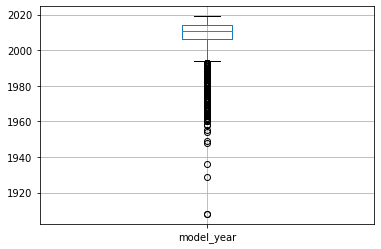

In [ ]:
#check the outlier of the model_year_clean dataset
model_year_clean.boxplot(column='model_year')

From the boxplot, we can clearly see there are some outliers. So the missing values can be filled with median.

In [ ]:
#create function to fill missing values
def fill_missing_value (df, model, model_year):
    grouped_values = df.groupby('model')['model_year'].median().reset_index()
    size = len(grouped_values)
    for i in range(size):
        group = grouped_values['model'][i]
        value = grouped_values['model_year'][i]
        df.loc[(df['model']==group) & (df['model_year'].isna()), 'model_year'] = value
    return df

The function will fill the missing values in `model_year` based on median in `model`.

In [ ]:
#fill missing values
df = fill_missing_value(df, 'model', 'model_year')

In [ ]:
#check the missing value
df['model_year'].isna().sum()

0

### **2.2 Fill the Missing Value in `odometer`**

In [ ]:
#create a clean dataset
odometer_clean = df.loc[~df['odometer'].isna()]
odometer_clean.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19
1,25500,2011.0,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,NaN,2019-02-07,79
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,NaN,2019-04-02,28
5,14990,2014.0,chrysler 300,excellent,6.0,gas,57954.0,automatic,sedan,black,1.0,2018-06-20,15


The values in `odometer` will be influenced by the `model` of the car.

In [ ]:
#check the values of median and mean in clean dataset
odometer_clean_pvt = odometer_clean.pivot_table(index='model_year', values='odometer', aggfunc=['median', 'mean'])
odometer_clean_pvt

,median,mean
,odometer,odometer
model_year,,
1908.0,169328.0,169328.000000
1936.0,30000.0,30000.000000
1948.0,4000.0,4000.000000
1949.0,1800.0,1800.000000
1954.0,3565.0,3565.000000
...,...,...
2015.0,78285.5,82503.819348
2016.0,53998.5,61244.992120


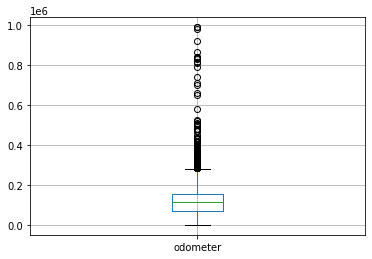

In [ ]:
#check the outlier of the odometer_clean dataset
odometer_clean.boxplot(column='odometer')

From the boxplot, we can see a lot of outliers. So, the missing values will be filled with median.

In [ ]:
#create function to fill missing values
def fill_missing_value (df, model_year, odometer):
    grouped_values = df.groupby('model_year')['odometer'].median().reset_index()
    size = len(grouped_values)
    for i in range(size):
        group = grouped_values['model_year'][i]
        value = grouped_values['odometer'][i]
        df.loc[(df['model_year']==group) & (df['odometer'].isna()), 'odometer'] = value
    return df

In [ ]:
#fill missing values
df = fill_missing_value(df, 'model_year', 'odometer')

In [ ]:
#check the missing value
df['odometer'].isna().sum()

1

There still one missing value in `odometer`.

In [ ]:
#check the data
df.loc[df['odometer'].isna()]

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
45694,18000,1929.0,ford f-150,good,8.0,gas,NaN,manual,other,silver,NaN,2018-11-18,59


The one that has missing values only has one model year. So the values need to be filled manually.

In [ ]:
#create new clean dataset for 'odometer'
odometer_clean_2 = df.loc[~df['odometer'].isna()]
odometer_clean_2

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19
1,25500,2011.0,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,NaN,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,161397.0,automatic,pickup,NaN,NaN,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,NaN,2019-04-02,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...
51520,9249,2013.0,nissan maxima,like new,6.0,gas,88136.0,automatic,sedan,black,NaN,2018-10-03,37
51521,2700,2002.0,honda civic,salvage,4.0,gas,181500.0,automatic,sedan,white,NaN,2018-11-14,22
51522,3950,2009.0,hyundai sonata,excellent,4.0,gas,128000.0,automatic,sedan,blue,NaN,2018-11-15,32
51523,7455,2013.0,toyota corolla,good,4.0,gas,139573.0,automatic,sedan,black,NaN,2018-07-02,71


In [ ]:
#check the median of all data
med_odometer = odometer_clean_2['odometer'].median()
med_odometer

114074.0

In [ ]:
#fill the median when model_year = 1929
df.loc[df.model_year == 1929, 'odometer'] = med_odometer

In [ ]:
#check the missing value
df['odometer'].isna().sum()

0

### **2.3 Fill the Missing Values in `paint_color`**

In [ ]:
#check the missing dataset
df.loc[df['paint_color'].isna()]

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19
3,1500,2003.0,ford f-150,fair,8.0,gas,161397.0,automatic,pickup,NaN,NaN,2019-03-22,9
8,11500,2012.0,kia sorento,excellent,4.0,gas,104174.0,automatic,SUV,NaN,1.0,2018-07-16,19
12,18990,2012.0,ram 1500,excellent,8.0,gas,140742.0,automatic,pickup,NaN,1.0,2019-04-02,37
21,5250,2007.0,toyota rav4,good,6.0,gas,154000.0,automatic,SUV,NaN,NaN,2018-08-22,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...
51502,7995,2011.0,chevrolet equinox,like new,4.0,gas,111088.0,automatic,SUV,NaN,NaN,2019-04-01,175
51503,6595,2011.0,chevrolet malibu,excellent,4.0,gas,100780.0,automatic,sedan,NaN,NaN,2019-02-27,73
51506,28900,2017.0,ford f150 supercrew cab xlt,good,6.0,gas,49225.0,automatic,pickup,NaN,1.0,2019-04-11,25
51519,11750,2015.0,honda accord,excellent,4.0,gas,78285.5,automatic,coupe,NaN,NaN,2018-11-24,89


From the dataset above, it is difficult to determine the color of the vehicle from any of the columns. So that missing values are better filled with unknown values.

In [ ]:
#fill the missing value
df['paint_color'] = df['paint_color'].fillna('unknown')

In [ ]:
#check the missing value
df['paint_color'].isna().sum()

0

### **2.4 Fill the Missing Values in `cylinders**`

In [ ]:
#create a clean dataset
cylinders_clean = df.loc[~df['cylinders'].isna()]
cylinders_clean

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,unknown,1.0,2018-06-23,19
1,25500,2011.0,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,NaN,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,161397.0,automatic,pickup,unknown,NaN,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,NaN,2019-04-02,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...
51520,9249,2013.0,nissan maxima,like new,6.0,gas,88136.0,automatic,sedan,black,NaN,2018-10-03,37
51521,2700,2002.0,honda civic,salvage,4.0,gas,181500.0,automatic,sedan,white,NaN,2018-11-14,22
51522,3950,2009.0,hyundai sonata,excellent,4.0,gas,128000.0,automatic,sedan,blue,NaN,2018-11-15,32
51523,7455,2013.0,toyota corolla,good,4.0,gas,139573.0,automatic,sedan,black,NaN,2018-07-02,71


The number of *cylinders* in a car depends on the type of vehicle (based on: yourmechanic.com) so the missing cylinder values can be filled in depending on the `type` column.

In [ ]:
#create pivot table to check the data
cylinders_pvt = cylinders_clean.pivot_table(index='type',values='condition', columns='cylinders', aggfunc='count')
cylinders_pvt

cylinders,3.0,4.0,5.0,6.0,8.0,10.0,12.0
type,,,,,,,
SUV,5.0,3020.0,9.0,5710.0,2373.0,64.0,NaN
bus,NaN,NaN,NaN,2.0,5.0,13.0,NaN
convertible,NaN,27.0,1.0,161.0,217.0,4.0,NaN
coupe,NaN,444.0,1.0,778.0,802.0,56.0,NaN
hatchback,2.0,870.0,NaN,21.0,19.0,5.0,NaN
mini-van,1.0,18.0,NaN,1013.0,2.0,NaN,NaN
offroad,NaN,18.0,NaN,139.0,35.0,NaN,NaN
other,NaN,75.0,NaN,110.0,40.0,NaN,NaN
pickup,3.0,257.0,41.0,1998.0,3943.0,32.0,NaN


In [ ]:
#create a new category for mini car
cylinders_clean.loc[cylinders_clean['type'].isin(['wagon', 'convertible', 'coupe', 'hatchback', 'mini-van', 'sedan', 'van']), 'type'] = 'mini car'

In [ ]:
#create a new category for medium car
cylinders_clean.loc[cylinders_clean['type'].isin(['other', 'SUV', 'pickup', 'truck', 'offroad']), 'type'] = 'medium car'

In [ ]:
cylinders_clean['type'].value_counts()

medium car    28960
mini car      17285
bus              20
Name: type, dtype: int64

In [ ]:
#create new pivot table to check the data
cylinders_pvt_new = cylinders_clean.pivot_table(index='type',values='condition', columns='cylinders', aggfunc='count')
cylinders_pvt_new

cylinders,3.0,4.0,5.0,6.0,8.0,10.0,12.0
type,,,,,,,
bus,NaN,NaN,NaN,2.0,5.0,13.0,NaN
medium car,10.0,3640.0,98.0,10422.0,14394.0,394.0,2.0
mini car,24.0,10224.0,174.0,5276.0,1445.0,142.0,NaN


/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


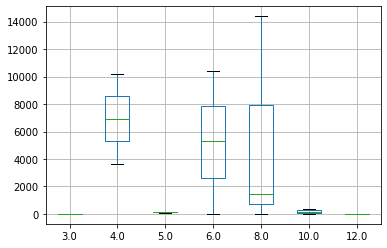

In [ ]:
#create boxplot
cylinders_pvt_new.boxplot()

There is no outlier in `cylinders`, so the data can be filled with mean.

In [ ]:
#create a new column for type cat
df.loc[df['type'].isin(['wagon', 'convertible', 'coupe', 'hatchback', 'mini-van', 'sedan', 'van']), 'type_cat'] = 'mini car'
df.loc[df['type'].isin(['other', 'SUV', 'pickup', 'truck', 'offroad']), 'type_cat'] = 'medium car'
df.loc[df['type'] == 'bus', 'type_cat'] = 'big car'

In [ ]:
#check the dataset
df.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,type_cat
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,unknown,1.0,2018-06-23,19,medium car
1,25500,2011.0,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50,medium car
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,NaN,2019-02-07,79,mini car
3,1500,2003.0,ford f-150,fair,8.0,gas,161397.0,automatic,pickup,unknown,NaN,2019-03-22,9,medium car
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,NaN,2019-04-02,28,mini car


In [ ]:
#create function to fill missing values
def fill_missing_value (df, type_cat, cylinders):
    grouped_values = df.groupby('type_cat')['cylinders'].mean().reset_index()
    size = len(grouped_values)
    for i in range(size):
        group = grouped_values['type_cat'][i]
        value = grouped_values['cylinders'][i]
        df.loc[(df['type_cat']==group) & (df['cylinders'].isna()), 'cylinders'] = value
    return df

In [ ]:
#fill missing values
df = fill_missing_value(df, 'type_cat', 'cylinders')

In [ ]:
#check the missing values
df['cylinders'].isna().sum()

0

### 2.5 Fill the Missing Values in `is_4wd`


In [ ]:
#check the data
df.pivot_table(index='type', values='price', columns='is_4wd', aggfunc='count')

is_4wd,1.0
type,
SUV,8853
convertible,53
coupe,76
hatchback,160
mini-van,39
offroad,206
other,126
pickup,5026
sedan,563


All of the missing values are not 1, but the data in `is_4wd` are boolean (either it's 1 or 0, to show are the vehicle are 4 wheeled or not). So it can be conlcuded that all of the missing values is 0.

In [ ]:
#fill the missing value
df['is_4wd'] = df['is_4wd'].fillna(value=0)

In [ ]:
#check the dataset
df.loc[df['type'].isna()]

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,type_cat


In [ ]:
#check the data info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    51525 non-null  float64
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     51525 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      51525 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   51525 non-null  object 
 10  is_4wd        51525 non-null  float64
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
 13  type_cat      51525 non-null  object 
dtypes: float64(4), int64(2), object(8)
memory usage: 5.5+ MB


All of the missing values are filled.

## **3 Change the Data Type**

Data in the `model_year`, `is_4wd`, and `cylinders` columns have the wrong data type. The best data type is int (integer) for several reasons:
1. The `model_year` column shows the year the car was manufactured, so it is impossible to show a float (fractional/decimal)
2. The `is_4wd` column indicates whether the car has 4 wheels as a drive or not, this column only contains 1 (as a yes answer) and 0 (as a no answer)
3. The `cylinders` column shows the number of drives in the car, so it cannot be a float number (fractional/decimal)

In [ ]:
#change the data type in `model_year`
df['model_year'] = df['model_year'].astype('int')

In [ ]:
#change the data type in `is_4wd`
df['is_4wd'] = df['is_4wd'].astype('int')

In [ ]:
#change the data type in `cylinders`
df['cylinders'] = df['cylinders'].astype('int')

Other than that, the data type in `date_posted` need to be changed.

In [ ]:
#change the data type in `date_posted`
df['date_posted'] = pd.to_datetime(df['date_posted'], format='%Y-%m-%d')

In [ ]:
#check the data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   price         51525 non-null  int64         
 1   model_year    51525 non-null  int64         
 2   model         51525 non-null  object        
 3   condition     51525 non-null  object        
 4   cylinders     51525 non-null  int64         
 5   fuel          51525 non-null  object        
 6   odometer      51525 non-null  float64       
 7   transmission  51525 non-null  object        
 8   type          51525 non-null  object        
 9   paint_color   51525 non-null  object        
 10  is_4wd        51525 non-null  int64         
 11  date_posted   51525 non-null  datetime64[ns]
 12  days_listed   51525 non-null  int64         
 13  type_cat      51525 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(5), object(7)
memory usage: 5.5+ MB


## **4 Add some Columns**

Some columns can be added to make analyzing data easier. For example:
- Add new columns for the week, month, and year the ad was shown
- The age of the vehicle when the ad was shown
- Vehicle mileage per year
- In the `condition` column replace the string value with a numeric scale

In [ ]:
#add years when the ads is aired
df['year_posted'] = df['date_posted'].dt.year
#check the data
df.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,type_cat,year_posted
0,9400,2011,bmw x5,good,6,gas,145000.0,automatic,SUV,unknown,1,2018-06-23,19,medium car,2018
1,25500,2011,ford f-150,good,6,gas,88705.0,automatic,pickup,white,1,2018-10-19,50,medium car,2018
2,5500,2013,hyundai sonata,like new,4,gas,110000.0,automatic,sedan,red,0,2019-02-07,79,mini car,2019
3,1500,2003,ford f-150,fair,8,gas,161397.0,automatic,pickup,unknown,0,2019-03-22,9,medium car,2019
4,14900,2017,chrysler 200,excellent,4,gas,80903.0,automatic,sedan,black,0,2019-04-02,28,mini car,2019


In [ ]:
#add month when the ads is aired
df['month_posted'] = df['date_posted'].dt.month
#check the data
df.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,type_cat,year_posted,month_posted
0,9400,2011,bmw x5,good,6,gas,145000.0,automatic,SUV,unknown,1,2018-06-23,19,medium car,2018,6
1,25500,2011,ford f-150,good,6,gas,88705.0,automatic,pickup,white,1,2018-10-19,50,medium car,2018,10
2,5500,2013,hyundai sonata,like new,4,gas,110000.0,automatic,sedan,red,0,2019-02-07,79,mini car,2019,2
3,1500,2003,ford f-150,fair,8,gas,161397.0,automatic,pickup,unknown,0,2019-03-22,9,medium car,2019,3
4,14900,2017,chrysler 200,excellent,4,gas,80903.0,automatic,sedan,black,0,2019-04-02,28,mini car,2019,4


In [ ]:
#add days when the ads is aired
df['day_posted'] = df['date_posted'].dt.weekday
#check the data
df.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,type_cat,year_posted,month_posted,day_posted
0,9400,2011,bmw x5,good,6,gas,145000.0,automatic,SUV,unknown,1,2018-06-23,19,medium car,2018,6,5
1,25500,2011,ford f-150,good,6,gas,88705.0,automatic,pickup,white,1,2018-10-19,50,medium car,2018,10,4
2,5500,2013,hyundai sonata,like new,4,gas,110000.0,automatic,sedan,red,0,2019-02-07,79,mini car,2019,2,3
3,1500,2003,ford f-150,fair,8,gas,161397.0,automatic,pickup,unknown,0,2019-03-22,9,medium car,2019,3,4
4,14900,2017,chrysler 200,excellent,4,gas,80903.0,automatic,sedan,black,0,2019-04-02,28,mini car,2019,4,1


In [ ]:
#add new column about vehicle age
df['vehicle_age'] = df['year_posted'] - df['model_year']
#check the data
df.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,type_cat,year_posted,month_posted,day_posted,vehicle_age
0,9400,2011,bmw x5,good,6,gas,145000.0,automatic,SUV,unknown,1,2018-06-23,19,medium car,2018,6,5,7
1,25500,2011,ford f-150,good,6,gas,88705.0,automatic,pickup,white,1,2018-10-19,50,medium car,2018,10,4,7
2,5500,2013,hyundai sonata,like new,4,gas,110000.0,automatic,sedan,red,0,2019-02-07,79,mini car,2019,2,3,6
3,1500,2003,ford f-150,fair,8,gas,161397.0,automatic,pickup,unknown,0,2019-03-22,9,medium car,2019,3,4,16
4,14900,2017,chrysler 200,excellent,4,gas,80903.0,automatic,sedan,black,0,2019-04-02,28,mini car,2019,4,1,2


When calculating new column `vehicle_age`, there will be 0 values so we need to change that.

In [ ]:
#change the value of vehicle age, if vehicle age = 0
df['vehicle_age'] = df['vehicle_age'].replace([0], 1)
#check the data
df.loc[df['vehicle_age'] == 0]

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,type_cat,year_posted,month_posted,day_posted,vehicle_age


In [ ]:
#add column of mean value of odometer per year
df['avg_odometer'] = round(df['odometer'] / df['vehicle_age'], 2)
#check the dataset
df.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,type_cat,year_posted,month_posted,day_posted,vehicle_age,avg_odometer
0,9400,2011,bmw x5,good,6,gas,145000.0,automatic,SUV,unknown,1,2018-06-23,19,medium car,2018,6,5,7,20714.29
1,25500,2011,ford f-150,good,6,gas,88705.0,automatic,pickup,white,1,2018-10-19,50,medium car,2018,10,4,7,12672.14
2,5500,2013,hyundai sonata,like new,4,gas,110000.0,automatic,sedan,red,0,2019-02-07,79,mini car,2019,2,3,6,18333.33
3,1500,2003,ford f-150,fair,8,gas,161397.0,automatic,pickup,unknown,0,2019-03-22,9,medium car,2019,3,4,16,10087.31
4,14900,2017,chrysler 200,excellent,4,gas,80903.0,automatic,sedan,black,0,2019-04-02,28,mini car,2019,4,1,2,40451.50


In [ ]:
#make a function to change to numeric scale
def numeric_condition(condition):
  if condition == 'new':
    return 5
  elif condition == 'like new':
    return 4
  elif condition == 'excellent':
    return 3
  elif condition == 'good':
    return 2
  elif condition == 'fair':
    return 1
  else:
    return 0

In [ ]:
#apply the function
df['condition_cat'] = df['condition'].apply(numeric_condition)
#check the dataset
df.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,type_cat,year_posted,month_posted,day_posted,vehicle_age,avg_odometer,condition_cat
0,9400,2011,bmw x5,good,6,gas,145000.0,automatic,SUV,unknown,1,2018-06-23,19,medium car,2018,6,5,7,20714.29,2
1,25500,2011,ford f-150,good,6,gas,88705.0,automatic,pickup,white,1,2018-10-19,50,medium car,2018,10,4,7,12672.14,2
2,5500,2013,hyundai sonata,like new,4,gas,110000.0,automatic,sedan,red,0,2019-02-07,79,mini car,2019,2,3,6,18333.33,4
3,1500,2003,ford f-150,fair,8,gas,161397.0,automatic,pickup,unknown,0,2019-03-22,9,medium car,2019,3,4,16,10087.31,1
4,14900,2017,chrysler 200,excellent,4,gas,80903.0,automatic,sedan,black,0,2019-04-02,28,mini car,2019,4,1,2,40451.50,3


## **5 Check The Clean Data**

In [ ]:
#check data info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   price          51525 non-null  int64         
 1   model_year     51525 non-null  int64         
 2   model          51525 non-null  object        
 3   condition      51525 non-null  object        
 4   cylinders      51525 non-null  int64         
 5   fuel           51525 non-null  object        
 6   odometer       51525 non-null  float64       
 7   transmission   51525 non-null  object        
 8   type           51525 non-null  object        
 9   paint_color    51525 non-null  object        
 10  is_4wd         51525 non-null  int64         
 11  date_posted    51525 non-null  datetime64[ns]
 12  days_listed    51525 non-null  int64         
 13  type_cat       51525 non-null  object        
 14  year_posted    51525 non-null  int64         
 15  month_posted   5152

In [ ]:
#describe the dataset
round(df.describe(), 2)

,price,model_year,cylinders,odometer,is_4wd,days_listed,year_posted,month_posted,day_posted,vehicle_age,avg_odometer,condition_cat
count,51525.00,51525.00,51525.00,51525.00,51525.0,51525.00,51525.00,51525.00,51525.00,51525.00,51525.00,51525.00
mean,12132.46,2009.79,6.07,115199.69,0.5,39.55,2018.31,6.63,3.01,8.56,17725.12,2.64
std,10040.80,6.10,1.59,62082.60,0.5,28.20,0.46,3.47,2.00,6.06,12442.78,0.71
min,1.00,1908.00,3.00,0.00,0.0,0.00,2018.00,1.00,0.00,1.00,0.00,0.00
25%,5000.00,2007.00,4.00,73500.00,0.0,19.00,2018.00,3.00,1.00,4.00,10909.09,2.00
50%,9000.00,2011.00,6.00,114074.00,0.0,33.00,2018.00,7.00,3.00,8.00,15234.36,3.00
75%,16839.00,2014.00,8.00,152862.00,1.0,53.00,2019.00,10.00,5.00,12.00,20982.50,3.00
max,375000.00,2019.00,12.00,990000.00,1.0,271.00,2019.00,12.00,6.00,110.00,373200.00,5.00


In [ ]:
#print data sample (head)
df.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,type_cat,year_posted,month_posted,day_posted,vehicle_age,avg_odometer,condition_cat
0,9400,2011,bmw x5,good,6,gas,145000.0,automatic,SUV,unknown,1,2018-06-23,19,medium car,2018,6,5,7,20714.29,2
1,25500,2011,ford f-150,good,6,gas,88705.0,automatic,pickup,white,1,2018-10-19,50,medium car,2018,10,4,7,12672.14,2
2,5500,2013,hyundai sonata,like new,4,gas,110000.0,automatic,sedan,red,0,2019-02-07,79,mini car,2019,2,3,6,18333.33,4
3,1500,2003,ford f-150,fair,8,gas,161397.0,automatic,pickup,unknown,0,2019-03-22,9,medium car,2019,3,4,16,10087.31,1
4,14900,2017,chrysler 200,excellent,4,gas,80903.0,automatic,sedan,black,0,2019-04-02,28,mini car,2019,4,1,2,40451.50,3


In [ ]:
#print data sample (tail)
df.tail()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,type_cat,year_posted,month_posted,day_posted,vehicle_age,avg_odometer,condition_cat
51520,9249,2013,nissan maxima,like new,6,gas,88136.0,automatic,sedan,black,0,2018-10-03,37,mini car,2018,10,2,5,17627.20,4
51521,2700,2002,honda civic,salvage,4,gas,181500.0,automatic,sedan,white,0,2018-11-14,22,mini car,2018,11,2,16,11343.75,0
51522,3950,2009,hyundai sonata,excellent,4,gas,128000.0,automatic,sedan,blue,0,2018-11-15,32,mini car,2018,11,3,9,14222.22,3
51523,7455,2013,toyota corolla,good,4,gas,139573.0,automatic,sedan,black,0,2018-07-02,71,mini car,2018,7,0,5,27914.60,2
51524,6300,2014,nissan altima,good,4,gas,90000.0,automatic,sedan,unknown,0,2018-06-05,10,mini car,2018,6,1,4,22500.00,2


## **6 Check the Outier**

Some of the columns has outliers, the important parameters are:
- Price
- Vehicle age
- Milage
- Cylinders
- Condition

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


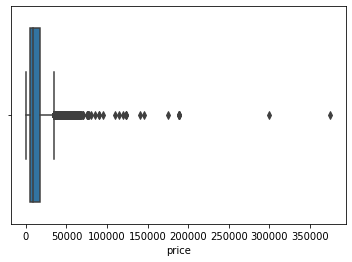

In [ ]:
#check the outlier of price
sns.boxplot(df['price']);

There's a lot of outliers in price.

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


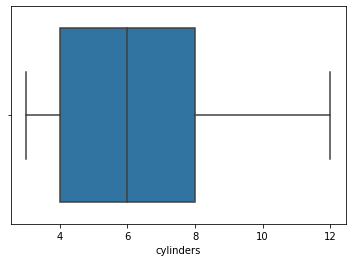

In [ ]:
#check outlier of cylinder
sns.boxplot(df['cylinders']);

There is no outlier in cylinders

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


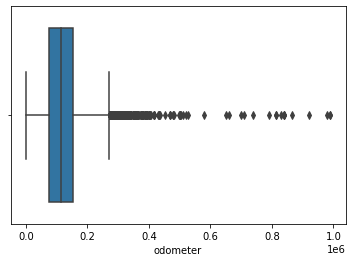

In [ ]:
#check outlier of odometer
sns.boxplot(df['odometer']);

There is a lot of outliers in odometer

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


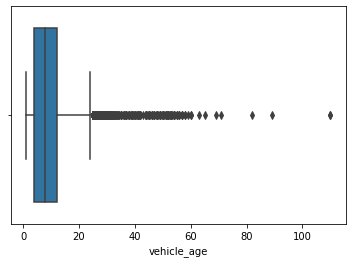

In [ ]:
#check outlier of vehicle age
sns.boxplot(df['vehicle_age']);

There is a lot of outlier in vehicle age

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


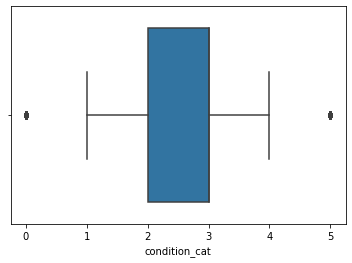

In [ ]:
#check outlier of condition
sns.boxplot(df['condition_cat']);

There is a lot of outlier in condition

## **7 Study and Handle the Outliers**

###**7.1 In `price`**

In [ ]:
#check the value of outlier
Q1_price = df['price'].quantile(0.25)
Q3_price = df['price'].quantile(0.75)
IQR_price = Q3_price - Q1_price

#check the lowerbound and upperbound value
lower_price = Q1_price - (1.5*IQR_price)
upper_price = Q3_price + (1.5*IQR_price)

#show the value
print(lower_price)
print(upper_price)


-12758.5
34597.5


If there are some values less than 0 (because there isn't any price that bellow 0) and more than 34,597.5, they are outliers.

In [ ]:
#save the data witout any outlier to the new dataset
price_clean = df.query('0 < price < @upper_price')
price_clean

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,type_cat,year_posted,month_posted,day_posted,vehicle_age,avg_odometer,condition_cat
0,9400,2011,bmw x5,good,6,gas,145000.0,automatic,SUV,unknown,1,2018-06-23,19,medium car,2018,6,5,7,20714.29,2
1,25500,2011,ford f-150,good,6,gas,88705.0,automatic,pickup,white,1,2018-10-19,50,medium car,2018,10,4,7,12672.14,2
2,5500,2013,hyundai sonata,like new,4,gas,110000.0,automatic,sedan,red,0,2019-02-07,79,mini car,2019,2,3,6,18333.33,4
3,1500,2003,ford f-150,fair,8,gas,161397.0,automatic,pickup,unknown,0,2019-03-22,9,medium car,2019,3,4,16,10087.31,1
4,14900,2017,chrysler 200,excellent,4,gas,80903.0,automatic,sedan,black,0,2019-04-02,28,mini car,2019,4,1,2,40451.50,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51520,9249,2013,nissan maxima,like new,6,gas,88136.0,automatic,sedan,black,0,2018-10-03,37,mini car,2018,10,2,5,17627.20,4
51521,2700,2002,honda civic,salvage,4,gas,181500.0,automatic,sedan,white,0,2018-11-14,22,mini car,2018,11,2,16,11343.75,0
51522,3950,2009,hyundai sonata,excellent,4,gas,128000.0,automatic,sedan,blue,0,2018-11-15,32,mini car,2018,11,3,9,14222.22,3
51523,7455,2013,toyota corolla,good,4,gas,139573.0,automatic,sedan,black,0,2018-07-02,71,mini car,2018,7,0,5,27914.60,2


### **7.2 In `vehicle_age`**

In [ ]:
#check the value of outlier
Q1_age = df['vehicle_age'].quantile(0.25)
Q3_age = df['vehicle_age'].quantile(0.75)
IQR_age = Q3_age - Q1_age

#check the lowerbound and upperbound value
lower_age = Q1_age - (1.5*IQR_age)
upper_age = Q3_age + (1.5*IQR_age)

#show the value
print(lower_age)
print(upper_age)

-8.0
24.0


If there are some values less than 0 (because there isn't any age that bellow 0) and more than 24, they are outliers.

In [ ]:
#create new dataset without outlier
age_clean = price_clean.query('0 < vehicle_age < @upper_age')
age_clean

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,type_cat,year_posted,month_posted,day_posted,vehicle_age,avg_odometer,condition_cat
0,9400,2011,bmw x5,good,6,gas,145000.0,automatic,SUV,unknown,1,2018-06-23,19,medium car,2018,6,5,7,20714.29,2
1,25500,2011,ford f-150,good,6,gas,88705.0,automatic,pickup,white,1,2018-10-19,50,medium car,2018,10,4,7,12672.14,2
2,5500,2013,hyundai sonata,like new,4,gas,110000.0,automatic,sedan,red,0,2019-02-07,79,mini car,2019,2,3,6,18333.33,4
3,1500,2003,ford f-150,fair,8,gas,161397.0,automatic,pickup,unknown,0,2019-03-22,9,medium car,2019,3,4,16,10087.31,1
4,14900,2017,chrysler 200,excellent,4,gas,80903.0,automatic,sedan,black,0,2019-04-02,28,mini car,2019,4,1,2,40451.50,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51520,9249,2013,nissan maxima,like new,6,gas,88136.0,automatic,sedan,black,0,2018-10-03,37,mini car,2018,10,2,5,17627.20,4
51521,2700,2002,honda civic,salvage,4,gas,181500.0,automatic,sedan,white,0,2018-11-14,22,mini car,2018,11,2,16,11343.75,0
51522,3950,2009,hyundai sonata,excellent,4,gas,128000.0,automatic,sedan,blue,0,2018-11-15,32,mini car,2018,11,3,9,14222.22,3
51523,7455,2013,toyota corolla,good,4,gas,139573.0,automatic,sedan,black,0,2018-07-02,71,mini car,2018,7,0,5,27914.60,2


### **7.3 In `odometer`**

In [ ]:
#check the value of outlier
Q1_meter = df['odometer'].quantile(0.25)
Q3_meter = df['odometer'].quantile(0.75)
IQR_meter = Q3_meter - Q1_meter

#check the lowerbound and upperbound value
lower_meter = Q1_meter - (1.5*IQR_meter)
upper_meter = Q3_meter + (1.5*IQR_meter)

#show the value
print(lower_meter)
print(upper_meter)

-45543.0
271905.0


If there are some values less than 0 (because there isn't any milage that bellow 0) and more than 271,905, they are outliers.

In [ ]:
#create a new dataset without outlier
meter_clean = age_clean.query('0 < odometer <= @upper_meter')
meter_clean

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,type_cat,year_posted,month_posted,day_posted,vehicle_age,avg_odometer,condition_cat
0,9400,2011,bmw x5,good,6,gas,145000.0,automatic,SUV,unknown,1,2018-06-23,19,medium car,2018,6,5,7,20714.29,2
1,25500,2011,ford f-150,good,6,gas,88705.0,automatic,pickup,white,1,2018-10-19,50,medium car,2018,10,4,7,12672.14,2
2,5500,2013,hyundai sonata,like new,4,gas,110000.0,automatic,sedan,red,0,2019-02-07,79,mini car,2019,2,3,6,18333.33,4
3,1500,2003,ford f-150,fair,8,gas,161397.0,automatic,pickup,unknown,0,2019-03-22,9,medium car,2019,3,4,16,10087.31,1
4,14900,2017,chrysler 200,excellent,4,gas,80903.0,automatic,sedan,black,0,2019-04-02,28,mini car,2019,4,1,2,40451.50,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51520,9249,2013,nissan maxima,like new,6,gas,88136.0,automatic,sedan,black,0,2018-10-03,37,mini car,2018,10,2,5,17627.20,4
51521,2700,2002,honda civic,salvage,4,gas,181500.0,automatic,sedan,white,0,2018-11-14,22,mini car,2018,11,2,16,11343.75,0
51522,3950,2009,hyundai sonata,excellent,4,gas,128000.0,automatic,sedan,blue,0,2018-11-15,32,mini car,2018,11,3,9,14222.22,3
51523,7455,2013,toyota corolla,good,4,gas,139573.0,automatic,sedan,black,0,2018-07-02,71,mini car,2018,7,0,5,27914.60,2


### **7.4 In `condition_cat`**

In [ ]:
#check the value of outlier
Q1_condi = df['condition_cat'].quantile(0.25)
Q3_condi = df['condition_cat'].quantile(0.75)
IQR_condi = Q3_condi - Q1_condi

#check the lowerbound and upperbound value
lower_condi = round(Q1_condi - (1.5*IQR_condi), 0)
upper_condi = round(Q3_condi + (1.5*IQR_condi), 0)

#show the value
print(lower_condi)
print(upper_condi)

0.0
4.0


If there are some values less than 0 and more than 4, they are outliers.

In [ ]:
#create a new dataset witout outlier
new_df = meter_clean.query('0 < condition_cat <= @upper_condi')
new_df

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,type_cat,year_posted,month_posted,day_posted,vehicle_age,avg_odometer,condition_cat
0,9400,2011,bmw x5,good,6,gas,145000.0,automatic,SUV,unknown,1,2018-06-23,19,medium car,2018,6,5,7,20714.29,2
1,25500,2011,ford f-150,good,6,gas,88705.0,automatic,pickup,white,1,2018-10-19,50,medium car,2018,10,4,7,12672.14,2
2,5500,2013,hyundai sonata,like new,4,gas,110000.0,automatic,sedan,red,0,2019-02-07,79,mini car,2019,2,3,6,18333.33,4
3,1500,2003,ford f-150,fair,8,gas,161397.0,automatic,pickup,unknown,0,2019-03-22,9,medium car,2019,3,4,16,10087.31,1
4,14900,2017,chrysler 200,excellent,4,gas,80903.0,automatic,sedan,black,0,2019-04-02,28,mini car,2019,4,1,2,40451.50,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51519,11750,2015,honda accord,excellent,4,gas,78285.5,automatic,coupe,unknown,0,2018-11-24,89,mini car,2018,11,5,3,26095.17,3
51520,9249,2013,nissan maxima,like new,6,gas,88136.0,automatic,sedan,black,0,2018-10-03,37,mini car,2018,10,2,5,17627.20,4
51522,3950,2009,hyundai sonata,excellent,4,gas,128000.0,automatic,sedan,blue,0,2018-11-15,32,mini car,2018,11,3,9,14222.22,3
51523,7455,2013,toyota corolla,good,4,gas,139573.0,automatic,sedan,black,0,2018-07-02,71,mini car,2018,7,0,5,27914.60,2


## **8 Check the Outliers in Clean Dataset**

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


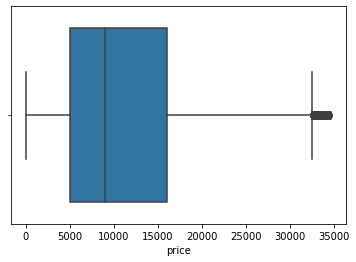

In [ ]:
#check the outlier of price in the new dataset
sns.boxplot(new_df['price']);

There are some outliers but less than before.

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


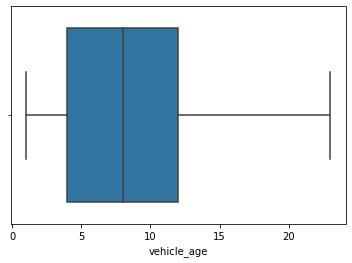

In [ ]:
#check the outlier of vehicle age in the new dataset
sns.boxplot(new_df['vehicle_age']);

There isn't any outliers after cleaning.

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


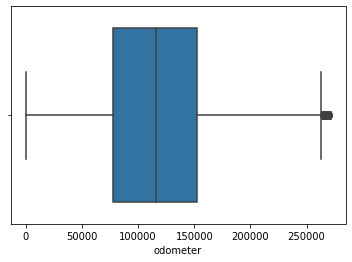

In [ ]:
#check the outlier of odometer in the new dataset
sns.boxplot(new_df['odometer']);

There still some outliers but less than before cleaning.

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


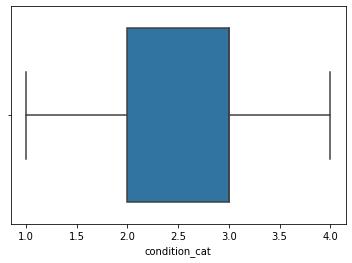

In [ ]:
#check the outlier of condition in the new dataset
sns.boxplot(new_df['condition_cat']);

There isn't any outlier after cleaning

## **9 Advertisement Expiry Date**

Expiry date of an ads can be determined from mean and median of the data.

In [ ]:
#describe the data
round(new_df['days_listed'].describe(), 0)

count    48051.0
mean        40.0
std         28.0
min          0.0
25%         19.0
50%         33.0
75%         53.0
max        271.0
Name: days_listed, dtype: float64

From the data above, it can be seen that the minimum ad was shown is 0 days and the maximum is 271 days. Ads shown 40 days, average.

From the data above, it can be seen whether there are values that are outliers.

In [ ]:
#check the value of outlier
Q1_days = new_df['days_listed'].quantile(0.25)
Q3_days = new_df['days_listed'].quantile(0.75)
IQR_days = Q3_days - Q1_days

#check the lowerbound and upperbound value
lower_days = Q1_days - (1.5*IQR_days)
upper_days = Q3_days + (1.5*IQR_days)

#show the value
print(lower_days)
print(upper_days)

-32.0
104.0


In [ ]:
#create a clean dataset
days_clean = new_df.query('0 < days_listed < 104')
days_clean

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,type_cat,year_posted,month_posted,day_posted,vehicle_age,avg_odometer,condition_cat
0,9400,2011,bmw x5,good,6,gas,145000.0,automatic,SUV,unknown,1,2018-06-23,19,medium car,2018,6,5,7,20714.29,2
1,25500,2011,ford f-150,good,6,gas,88705.0,automatic,pickup,white,1,2018-10-19,50,medium car,2018,10,4,7,12672.14,2
2,5500,2013,hyundai sonata,like new,4,gas,110000.0,automatic,sedan,red,0,2019-02-07,79,mini car,2019,2,3,6,18333.33,4
3,1500,2003,ford f-150,fair,8,gas,161397.0,automatic,pickup,unknown,0,2019-03-22,9,medium car,2019,3,4,16,10087.31,1
4,14900,2017,chrysler 200,excellent,4,gas,80903.0,automatic,sedan,black,0,2019-04-02,28,mini car,2019,4,1,2,40451.50,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51519,11750,2015,honda accord,excellent,4,gas,78285.5,automatic,coupe,unknown,0,2018-11-24,89,mini car,2018,11,5,3,26095.17,3
51520,9249,2013,nissan maxima,like new,6,gas,88136.0,automatic,sedan,black,0,2018-10-03,37,mini car,2018,10,2,5,17627.20,4
51522,3950,2009,hyundai sonata,excellent,4,gas,128000.0,automatic,sedan,blue,0,2018-11-15,32,mini car,2018,11,3,9,14222.22,3
51523,7455,2013,toyota corolla,good,4,gas,139573.0,automatic,sedan,black,0,2018-07-02,71,mini car,2018,7,0,5,27914.60,2


In [ ]:
#describe new dataset
round(days_clean['days_listed'].describe(), 0)

count    46418.0
mean        37.0
std         23.0
min          1.0
25%         18.0
50%         32.0
75%         51.0
max        103.0
Name: days_listed, dtype: float64

In [ ]:
#check the value of outlier
Q1_days_1 = days_clean['days_listed'].quantile(0.25)
Q3_days_1 = days_clean['days_listed'].quantile(0.75)
IQR_days_1 = Q3_days_1 - Q1_days_1

#check the lowerbound and upperbound value
lower_days_1 = round(Q1_days_1 - (1.5*IQR_days_1), 0)
upper_days_1 = round(Q3_days_1 + (1.5*IQR_days_1), 0)

#show the value
print(lower_days_1)
print(upper_days_1)

-32.0
100.0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f3bbc8eeac0>]],
      dtype=object)

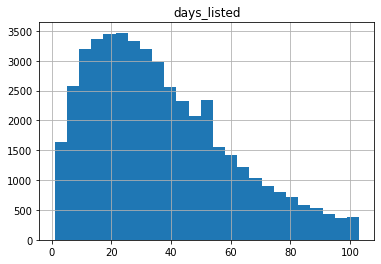

In [ ]:
#check the value of too fast or too long ads
days_clean.hist('days_listed', bins= 25)

The peaks of the dataset appear at intervals of 20 - 40, corresponding to the average days of ad is shown (40 days). From the data above it can be concluded that the ad is too long if it is more than 100 days and too short if it is less than 18 days.

## **10 Average Price for Every type of Vihecle**

In [ ]:
#create a new table
type_mean = new_df.groupby(['type']).agg({
    'price' : 'mean',
    'model' : 'count'
}).rename(columns={
    'price' : 'avg_price',
    'model' : 'count_type'
}).sort_values(by='count_type', ascending=False)

type_mean

,avg_price,count_type
type,,
sedan,6967.625505,11880
SUV,10451.445343,11865
truck,15150.837960,11059
pickup,15067.626314,6278
coupe,13544.286930,1997
wagon,9016.533019,1484
mini-van,8032.268357,1144
hatchback,6833.329305,993
van,8815.514630,581


Text(0.5, 0, 'Avegage Price and Ads Count per Model')

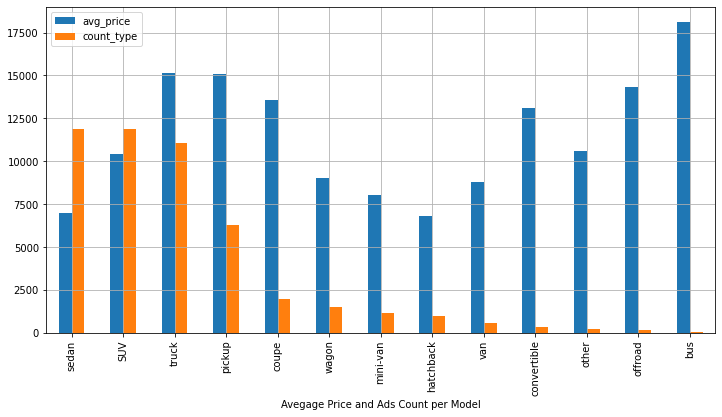

In [ ]:
#create a graph
type_mean.plot(kind='bar', grid=True, figsize=(12, 6))
plt.xlabel('Avegage Price and Ads Count per Model')

The highest number of advertisements are for sedan and SUV models. This can be seen from the price offered tends to be low. Even though hatchbacks are lower on average, the number of cars that will be sold is lower. This could be due to the fact that hatchback cars are less desirable than sedans and SUVs. Some consumers choose to buy a sedan because it is safer. According to some sources, hatchbacks have bigger windows and are easier for thieves to break into.

## **11 Determine the Factors that Affect the Price**

### **11.1 for Sedan**

Several factors that may influence the price are age, mileage, condition, type of transmission, and color.

In [ ]:
#create a new dataset for sedan only
sedan_df = new_df.loc[new_df['type'] == 'sedan'].reset_index(drop=True)
sedan_df.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,type_cat,year_posted,month_posted,day_posted,vehicle_age,avg_odometer,condition_cat
0,5500,2013,hyundai sonata,like new,4,gas,110000.0,automatic,sedan,red,0,2019-02-07,79,mini car,2019,2,3,6,18333.33,4
1,14900,2017,chrysler 200,excellent,4,gas,80903.0,automatic,sedan,black,0,2019-04-02,28,mini car,2019,4,1,2,40451.50,3
2,14990,2014,chrysler 300,excellent,6,gas,57954.0,automatic,sedan,black,1,2018-06-20,15,mini car,2018,6,2,4,14488.50,3
3,12990,2015,toyota camry,excellent,4,gas,79212.0,automatic,sedan,white,0,2018-12-27,73,mini car,2018,12,3,3,26404.00,3
4,8990,2012,honda accord,excellent,4,gas,111142.0,automatic,sedan,grey,0,2019-03-28,29,mini car,2019,3,3,7,15877.43,3


In [ ]:
#check the correlation
round(sedan_df.corr()['price'], 2)

price            1.00
model_year       0.62
cylinders       -0.05
odometer        -0.57
is_4wd           0.04
days_listed      0.00
year_posted      0.02
month_posted    -0.02
day_posted      -0.00
vehicle_age     -0.61
avg_odometer     0.27
condition_cat    0.29
Name: price, dtype: float64

For categorical values, the sum of the ads should be 50 ads or more.

In [ ]:
#check the values for transmission
sedan_df['transmission'].value_counts()

automatic    11180
manual         573
other          127
Name: transmission, dtype: int64

In [ ]:
#check the values for color
sedan_df['paint_color'].value_counts()

unknown    2139
silver     2016
black      1738
grey       1597
white      1469
blue       1204
red         920
custom      288
brown       253
green       202
purple       24
yellow       21
orange        9
Name: paint_color, dtype: int64

In [ ]:
#drop the values that doesn't have > 50 ads
sedan_df['paint_color'].value_counts()[:-3]

unknown    2139
silver     2016
black      1738
grey       1597
white      1469
blue       1204
red         920
custom      288
brown       253
green       202
Name: paint_color, dtype: int64

In [ ]:
#create a list
new_list_sedan = list(sedan_df['paint_color'].value_counts()[:-2].index)

#create a new dataset for analysis
color_sedan = sedan_df[sedan_df['paint_color'].isin(new_list_sedan)].reset_index(drop=True)
color_sedan

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,type_cat,year_posted,month_posted,day_posted,vehicle_age,avg_odometer,condition_cat
0,5500,2013,hyundai sonata,like new,4,gas,110000.0,automatic,sedan,red,0,2019-02-07,79,mini car,2019,2,3,6,18333.33,4
1,14900,2017,chrysler 200,excellent,4,gas,80903.0,automatic,sedan,black,0,2019-04-02,28,mini car,2019,4,1,2,40451.50,3
2,14990,2014,chrysler 300,excellent,6,gas,57954.0,automatic,sedan,black,1,2018-06-20,15,mini car,2018,6,2,4,14488.50,3
3,12990,2015,toyota camry,excellent,4,gas,79212.0,automatic,sedan,white,0,2018-12-27,73,mini car,2018,12,3,3,26404.00,3
4,8990,2012,honda accord,excellent,4,gas,111142.0,automatic,sedan,grey,0,2019-03-28,29,mini car,2019,3,3,7,15877.43,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11845,3750,2005,ford taurus,excellent,6,gas,110200.0,automatic,sedan,silver,0,2018-08-10,63,mini car,2018,8,4,13,8476.92,3
11846,9249,2013,nissan maxima,like new,6,gas,88136.0,automatic,sedan,black,0,2018-10-03,37,mini car,2018,10,2,5,17627.20,4
11847,3950,2009,hyundai sonata,excellent,4,gas,128000.0,automatic,sedan,blue,0,2018-11-15,32,mini car,2018,11,3,9,14222.22,3
11848,7455,2013,toyota corolla,good,4,gas,139573.0,automatic,sedan,black,0,2018-07-02,71,mini car,2018,7,0,5,27914.60,2


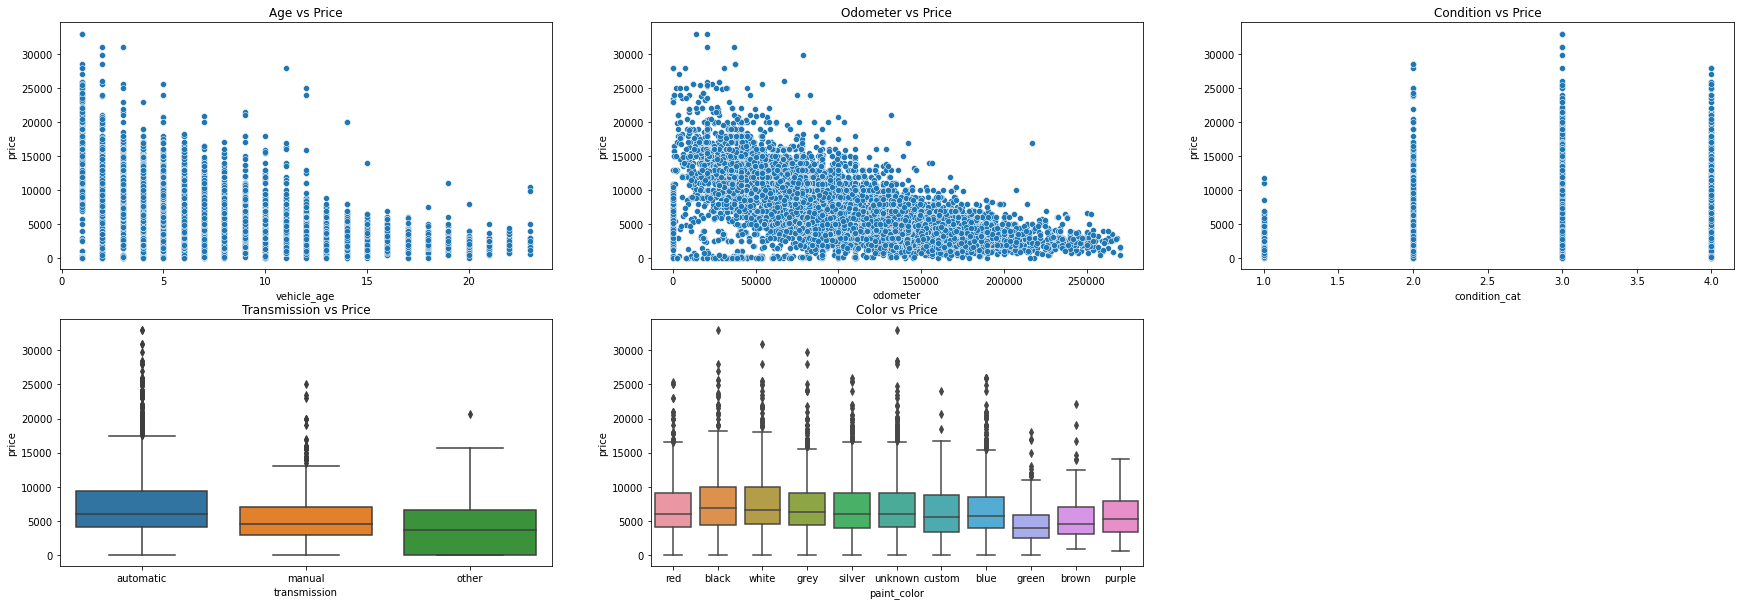

In [ ]:
#create some graphs
plt.figure(figsize=(30, 10))

plt.subplot(2, 3, 1)
plt.title('Age vs Price')
sns.scatterplot(data=sedan_df, x='vehicle_age', y='price')

plt.subplot(2, 3, 2)
plt.title('Odometer vs Price')
sns.scatterplot(data=sedan_df, x='odometer', y='price')

plt.subplot(2, 3, 3)
plt.title('Condition vs Price')
sns.scatterplot(data=sedan_df, x='condition_cat', y='price')

plt.subplot(2, 3, 4)
plt.title('Transmission vs Price')
sns.boxplot(data=sedan_df, x='transmission', y='price')

plt.subplot(2, 3, 5)
plt.title('Color vs Price')
sns.boxplot(data=color_sedan, x='paint_color', y='price')

plt.show()

From the data above, it can be conluded that:
- The age parameter of the vehicle has the greatest influence in determining the price. The older the car (the greater its age), the lower the price.
- The mileage parameter has the 2nd biggest influence after age in determining the price. The longer the mileage, the lower the price.
- Parameters of the condition of the goods also have a relationship. The better the condition, the higher the price
- Transmission parameters have no correlation, but from the data above it can be shown that sedans with automatic transmission have the highest price
- The color parameter has no correlation, but the data above shows that black sedans have the highest price

### **11.2 for SUV**

Several factors that may influence the price are age, mileage, condition, type of transmission, and color.

In [ ]:
#create a new dataset for SUV
suv_df = new_df.loc[new_df['type'] == 'SUV'].reset_index(drop=True)
suv_df.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,type_cat,year_posted,month_posted,day_posted,vehicle_age,avg_odometer,condition_cat
0,9400,2011,bmw x5,good,6,gas,145000.0,automatic,SUV,unknown,1,2018-06-23,19,medium car,2018,6,5,7,20714.29,2
1,15990,2013,honda pilot,excellent,6,gas,109473.0,automatic,SUV,black,1,2019-01-07,68,medium car,2019,1,0,6,18245.50,3
2,11500,2012,kia sorento,excellent,4,gas,104174.0,automatic,SUV,unknown,1,2018-07-16,19,medium car,2018,7,0,6,17362.33,3
3,9200,2008,honda pilot,excellent,6,gas,147191.0,automatic,SUV,blue,1,2019-02-15,17,medium car,2019,2,4,11,13381.00,3
4,12990,2009,gmc yukon,excellent,8,gas,132285.0,automatic,SUV,black,1,2019-01-31,24,medium car,2019,1,3,10,13228.50,3


In [ ]:
#check the correlation
round(suv_df.corr()['price'], 2)

price            1.00
model_year       0.58
cylinders       -0.01
odometer        -0.53
is_4wd           0.11
days_listed     -0.02
year_posted      0.00
month_posted    -0.01
day_posted       0.01
vehicle_age     -0.58
avg_odometer     0.26
condition_cat    0.26
Name: price, dtype: float64

In [ ]:
#check the values of ads based on transmission
suv_df['transmission'].value_counts()

automatic    11247
manual         460
other          158
Name: transmission, dtype: int64

For categorical values, the sum of the ads should be 50 ads or more.

In [ ]:
#check the values of ads based on colors
suv_df['paint_color'].value_counts()

unknown    2134
black      2089
white      1865
silver     1530
grey       1145
blue       1009
red         869
green       415
brown       352
custom      294
orange       81
yellow       43
purple       39
Name: paint_color, dtype: int64

In [ ]:
#drop the values that doesn't have > 50 ads
suv_df['paint_color'].value_counts()[:-2]

unknown    2134
black      2089
white      1865
silver     1530
grey       1145
blue       1009
red         869
green       415
brown       352
custom      294
orange       81
Name: paint_color, dtype: int64

In [ ]:
#create a list
new_list_suv = list(suv_df['paint_color'].value_counts()[:-2].index)

#create a new dataset for analysis
color_suv = suv_df[suv_df['paint_color'].isin(new_list_suv)].reset_index(drop=True)
color_suv

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,type_cat,year_posted,month_posted,day_posted,vehicle_age,avg_odometer,condition_cat
0,9400,2011,bmw x5,good,6,gas,145000.0,automatic,SUV,unknown,1,2018-06-23,19,medium car,2018,6,5,7,20714.29,2
1,15990,2013,honda pilot,excellent,6,gas,109473.0,automatic,SUV,black,1,2019-01-07,68,medium car,2019,1,0,6,18245.50,3
2,11500,2012,kia sorento,excellent,4,gas,104174.0,automatic,SUV,unknown,1,2018-07-16,19,medium car,2018,7,0,6,17362.33,3
3,9200,2008,honda pilot,excellent,6,gas,147191.0,automatic,SUV,blue,1,2019-02-15,17,medium car,2019,2,4,11,13381.00,3
4,12990,2009,gmc yukon,excellent,8,gas,132285.0,automatic,SUV,black,1,2019-01-31,24,medium car,2019,1,3,10,13228.50,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11778,9500,2012,chevrolet traverse,good,6,gas,144500.0,automatic,SUV,unknown,1,2019-03-05,1,medium car,2019,3,1,7,20642.86,2
11779,4999,2002,toyota 4runner,excellent,6,gas,177901.0,automatic,SUV,unknown,1,2018-05-26,59,medium car,2018,5,5,16,11118.81,3
11780,6995,2012,buick enclave,excellent,6,gas,157000.0,automatic,SUV,white,1,2018-08-04,17,medium car,2018,8,5,6,26166.67,3
11781,7995,2011,chevrolet equinox,like new,4,gas,111088.0,automatic,SUV,unknown,0,2019-04-01,175,medium car,2019,4,0,8,13886.00,4


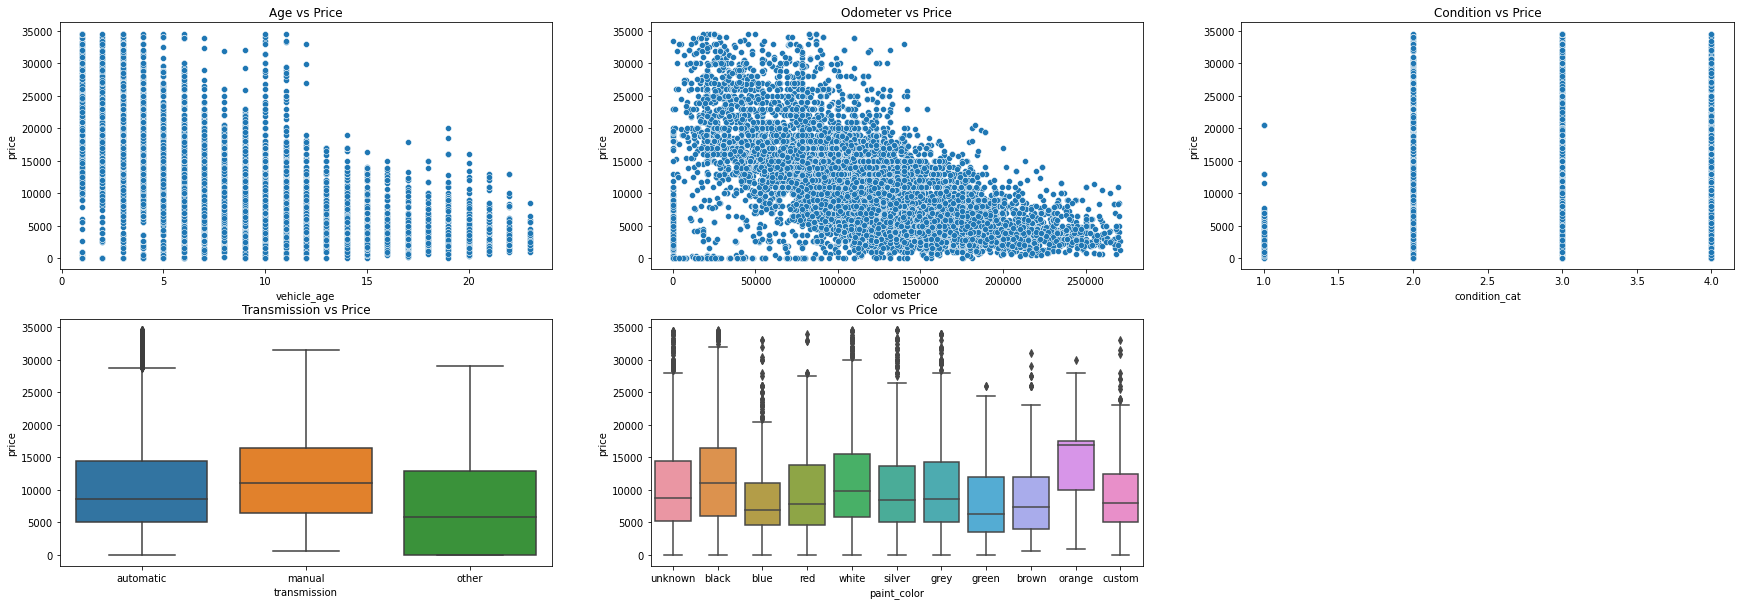

In [ ]:
#create some graphs
plt.figure(figsize=(30, 10))

plt.subplot(2, 3, 1)
plt.title('Age vs Price')
sns.scatterplot(data=suv_df, x='vehicle_age', y='price')

plt.subplot(2, 3, 2)
plt.title('Odometer vs Price')
sns.scatterplot(data=suv_df, x='odometer', y='price')

plt.subplot(2, 3, 3)
plt.title('Condition vs Price')
sns.scatterplot(data=suv_df, x='condition_cat', y='price')

plt.subplot(2, 3, 4)
plt.title('Transmission vs Price')
sns.boxplot(data=suv_df, x='transmission', y='price')

plt.subplot(2, 3, 5)
plt.title('Color vs Price')
sns.boxplot(data=color_suv, x='paint_color', y='price')

plt.show()

From the data above, it can be concluded that:
- The age parameter of the vehicle has the greatest influence in determining the price. The older the car (the greater its age), the lower the price.
- The mileage parameter has the 2nd biggest influence after age in determining the price. The longer the mileage, the lower the price.
- Parameters of the condition of the goods also have a relationship. The better the condition, the higher the price
- Transmission parameters have no correlation, but from the data above it can be shown that SUVs with manual transmission have the highest price
- The color parameter has no correlation, but the data above shows that the SUV with the orange color has the highest price

## **12 Conclution**

The data provided has several problems including:
- there are missing values ​​in several columns. This missing value is filled with the average, median, or other value (as in the column `is_4wd` filled with 0)
- there are some outliers from the initial dataset (`df`) and have been cleaned and stored in a new dataset (`new_df`). These outliers can occur due to errors in the analysis process or data input, or occur naturally in data with large variations.

From the results of data analysis, several conclusions that can be drawn are:
- Ad serving limit is 100 days, and the fastest is 18 days. If the ad is faster than 18 days then it is considered too short and if it is longer than 100 days then it is too long
- Some of the factors that affect the selling price are
  - The age of the vehicle, of all the types of cars analyzed, the age of the vehicle is the biggest factor influencing the price. The greater the age of the vehicle (older) then the selling price will decrease
  - Mileage, of all types of cars analyzed, mileage is the second parameter that affects the price. The farther the distance traveled by the car, the price will decrease
  - The condition of the car, of all the types of cars analyzed, the condition of the car has a correlation with the price. The better the condition of the vehicle, the higher the price
  - Transmission, of all types of cars analyzed, there is no correlation between the type of transmission and price. However, for sedan car types, the automatic transmission type has the highest price, while the manual transmission type SUV has the highest price among other types of transmission.
  - Color, of all types of cars analyzed, there is no correlation between color and price. For this type of sedan, the color that has the most expensive price is black, while for SUVs it is orange.